In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data (Pixel values between 0 and 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to fit into the model (flattened into 784-dimensional vectors)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Define the size of the encoded representation (latent space size)
encoding_dim = 32

# Input placeholder
input_img = Input(shape=(784,))

# Encoder: Encodes input into a smaller representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder: Decodes the smaller representation back to the original input size
decoded = Dense(784, activation='sigmoid')(encoded)

# Model that maps input to its reconstruction
autoencoder = Model(input_img, decoded)

# Separate Encoder Model
encoder = Model(input_img, encoded)

# Create a decoder model (decoder layer)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Last layer of the autoencoder
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder and store the training history
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0923 - val_loss: 0.0915
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


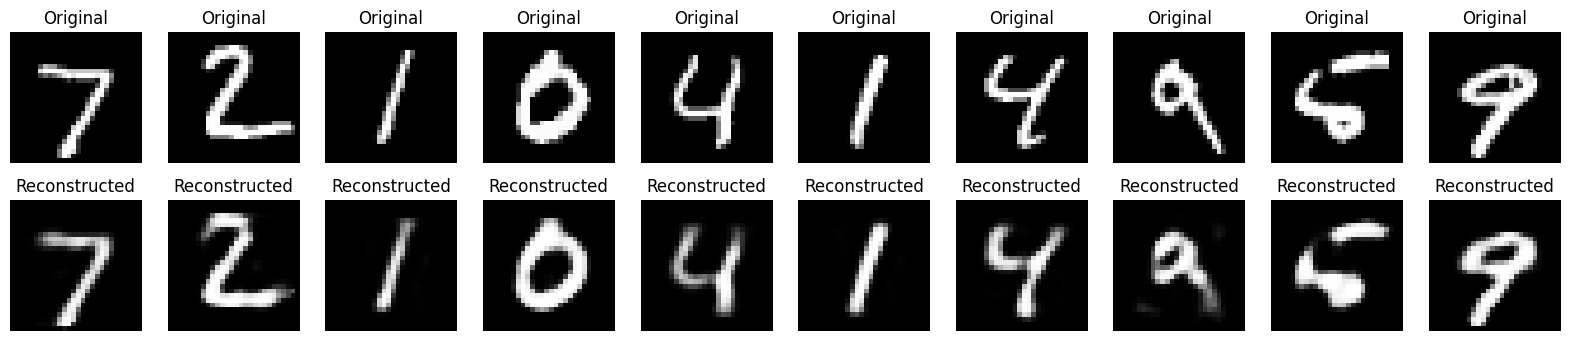

In [7]:
# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Visualize the original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

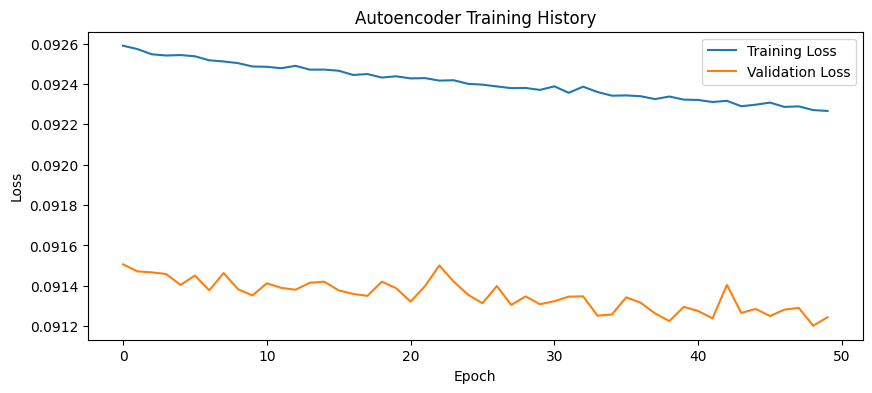

In [8]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Calculate and print compression ratio
original_size = x_test.nbytes
encoded_imgs = encoder.predict(x_test)  # Get the encoded images
compressed_size = encoded_imgs.nbytes
compression_ratio = original_size / compressed_size
print(f"Compression Ratio: {compression_ratio:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Compression Ratio: 24.50
